# Practicas de Computer Vision
%pip install azure.cognitiveservices.vision.computervision

In [7]:
# Establecemos nuestras credenciales
key='00d80b39d43948fb890b94b364bdf3c0'  # key y endpoint se obtienen del recurso en Azure en la parte de Claves y puntos de conexion (Clave 1 y Extremo)
endpoint= 'https://cv-dr-labo01.cognitiveservices.azure.com/'

In [8]:
# Conectamos con azure
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials

client= ComputerVisionClient(endpoint,CognitiveServicesCredentials(key))

In [9]:
import vision
import os

%matplotlib inline

# Obtenemos la imagen
image_path = './vision/girl.jpg'

image_stream= open(image_path, "rb")
description = client.describe_image_in_stream(image_stream) #Abre la imagen y la describe
print(description)

vision.show_image_caption(image_path, description) #Usa un metodo del archivo vision.py para escribir sobre la imagen la descripcion obtenida

ComputerVisionErrorResponseException: (401) Access denied due to invalid subscription key or wrong API endpoint. Make sure to provide a valid key for an active subscription and use a correct regional API endpoint for your resource.

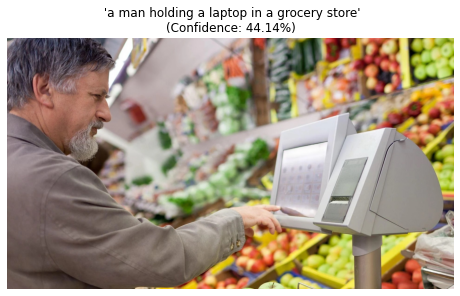

In [ ]:
image_path = './vision/man_supermarket.jpg' # cargamos otra imagen

image_stream = open(image_path, "rb")
description = client.describe_image_in_stream(image_stream)

vision.show_image_caption(image_path, description)

In [10]:
# Obtenemos la imagen
image_path = './vision/girl.jpg'

# Se indican que caracteristicas se quieren usar
features = ['Description', 'Tags', 'Adult', 'Objects', 'Faces']

image_stream = open(image_path, "rb")
analysis = client.analyze_image_in_stream(image_stream, visual_features=features)

vision.show_image_analysis(image_path, analysis) # se usa otro metodo del archivo vision.py para mostrar el analisis

ComputerVisionErrorResponseException: (401) Access denied due to invalid subscription key or wrong API endpoint. Make sure to provide a valid key for an active subscription and use a correct regional API endpoint for your resource.

# FaceAPI

%pip install azure-cognitiveservices-vision-face

In [ ]:
key= 'eaa72e4d05b14f6d8ace989fc7a6c95f'
endpoint= 'https://face-dr-lab02.cognitiveservices.azure.com/'

# Conectamos con azure
from azure.cognitiveservices.vision.face import FaceClient  # nos conectamos al servicio de face
from msrest.authentication import CognitiveServicesCredentials

client= FaceClient(endpoint,CognitiveServicesCredentials(key))

In [ ]:
import faces
import os
%matplotlib inline

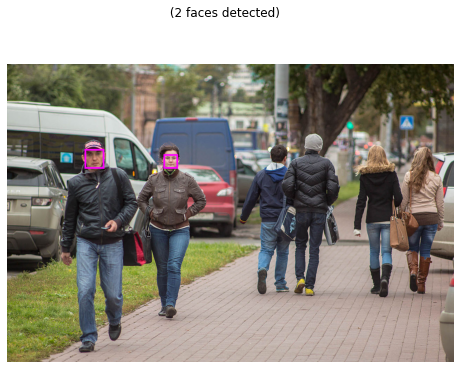

In [ ]:
image_path ='./vision/people.jpg' # Se indica donde esta la imagen
image_stream = open(image_path, "rb") # Se abre la imagen. rb permisos de escritura correctos

detected_faces = client.face.detect_with_stream(image=image_stream) # Se analiza la imagen con el algoritmo de azure

faces.show_faces(image_path, detected_faces) # usamos la funcion show_faces del archivo face.py y le pasamos los parametros

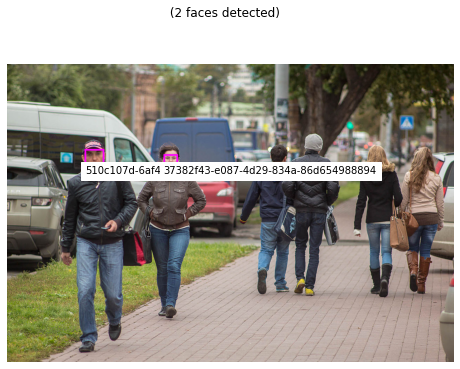

In [ ]:
image_path ='./vision/people.jpg'
image_stream = open(image_path, "rb")

detected_faces = client.face.detect_with_stream(image=image_stream)

faces.show_faces(image_path, detected_faces, show_id=True) #show_id=True muestra el id que tienen las caras

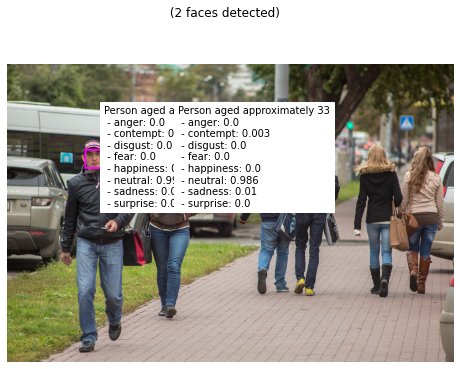

In [ ]:
image_path ='./vision/people.jpg'
image_stream = open(image_path, "rb")

attributes = ['age', 'emotion'] 

detected_faces = client.face.detect_with_stream(image= image_stream, return_face_attributes=attributes)

faces.show_face_attributes(image_path, detected_faces)